In [14]:
#1.1 PIL
from PIL import Image
pil_im = Image.open('E:\\1.jpg')#读取图像
pil_im = pil_im.convert('L')#转化图像,L表示灰度图
pil_im.save('E:\\2.jpg')#讲图片另存为

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\1.jpg'

In [14]:
import os
#返回目录中所有的jpg文件名
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]
print(get_imlist('E:\\'))

['E:\\1.jpg', 'E:\\2.jpg']


In [16]:
pil_im.thumbnail((128,128))#创建128像素的缩略图
pil_im.save('E:\\3.jpg')

In [20]:
box = (100, 100, 400,400)
pil_im = Image.open('E:\\1.jpg')
region = pil_im.crop(box)#拷贝区域图像
region = region.transpose(Image.ROTATE_180)#图像旋转180
pil_im.paste(region, box)#粘贴图形
pil_im.save('E:\\4.jpg')

In [21]:
out = pil_im.resize((128, 128))#重新调整大小
out = pil_im.rotate(45)#逆时针旋转

In [22]:
#1.2 Matplotlib

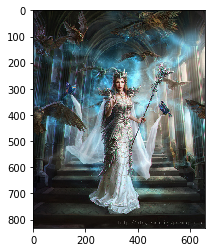

In [46]:
from pylab import *
im = array(Image.open('E:\\1.jpg'))
imshow(im)
x = [100, 100, 400, 400]
y = [200, 500, 200, 500]
plot(x,y,'r*')#红线星号绘制点
plot(x[:2], y[:2],'r')#前2个点连线
title('Plooting: "empire.jpg"')
axis('off')#取消坐标轴
show()

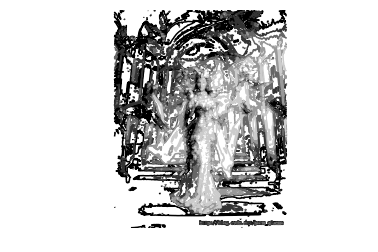

In [33]:
#显示图像轮廓
im = array(Image.open('E:\\1.jpg').convert('L'))
figure()#新建图像
gray()#不适用颜色信息
#在原点的左上角显示轮廓图像
contour(im, origin='image')
axis('equal')
axis('off')
show()

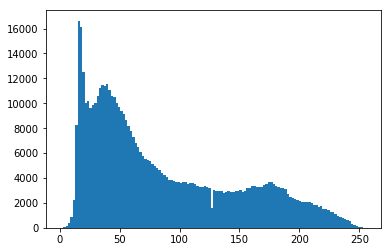

In [34]:
#绘制直方图
figure()
hist(im.flatten(), 128)
show()

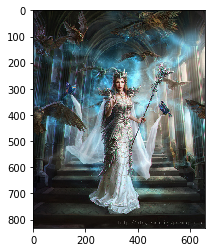

In [50]:
#交互式标注
im = array(Image.open('E:\\1.jpg'))
imshow(im)
x = ginput(3)
show()

In [51]:
#1.3 NumPy

0 255


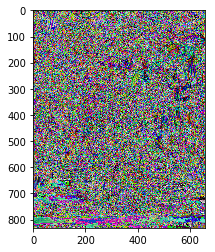

In [12]:
# 灰度变化
from numpy import *
from PIL import Image
from pylab import *
im = array(Image.open('E:\\imageTool\\1.jpg'))
im2 = 255 - im #对图像进行反向处理
im3 = (100.0/255)*im + 100 #像素值变为100至200之间
im4 = 255*(im/255)**2#图像求平方
print(im.min(), im.max())
imshow(im4)
show()
pil_im = Image.fromarray(im2)#将array变为pil对象

In [13]:
#图像数组的缩放
def imresize(im, sz):
    pil_im = Image.fromarray(uint8(im))
    return array(pil_im.resize(sz))

## 灰度图像直方图均衡化

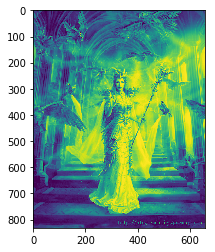

In [20]:
def histeq(im, nbr_bins=256):
    #计算图像的直方图
    imhist, bins = histogram(im.flatten(), nbr_bins, normed=True)
    cdf = imhist.cumsum()
    cdf = 255 * cdf / cdf[-1] #归一化
    im2 = interp(im.flatten(), bins[:-1], cdf)
    return im2.reshape(im.shape), cdf

im  = array(Image.open('E:\\imageTool\\1.jpg').convert('L'))
im2, cdf = histeq(im)
imshow(im2)
show()

## 主成分分析

In [21]:
def pca(x):
    num_data, dim = x.shape#获得维数
    #数据中心化
    meanx = x.mean(axis = 0)
    x = x - meanx
    
    if dim > num_data:
        #使用紧致技巧
        m = dot(x, x.T)
        e , EV = linalg.eigh(m)
        tmp = dot(x.T, EV).T
        V = tmp[::-1]
        S = sqrt(e)[::-1]
        for i in range(V.shape[1]):
            V[:, i] /= S
    else:
        #使用SVD方法
        U, S, V = linalg.svd(x)
        V = V[:num_data]
    return V,S,meanx

## pickle模块

In [25]:
import pickle
with open('font_pca_models.pkl', 'wb') as f:
    pickle.dump(immean, f)
    pickle.dump(V, f)
    
with open('font_pca_models.pkl', 'rb') as f:
    immean = pickle.load(f)
    V = pickle.load(f)

NameError: name 'immean' is not defined

# scipy

## 图像模糊

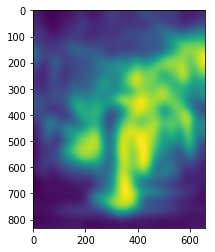

In [28]:
from scipy.ndimage import filters
im = array(Image.open('E:\\imageTool\\1.jpg').convert('L'))
im2 = filters.gaussian_filter(im, 20)#第二个参数表示标准差,越大越模糊
imshow(im2)
show()

## 图片导数

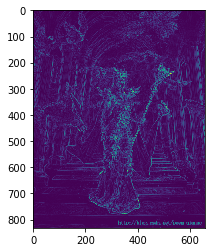

In [29]:
im = array(Image.open('E:\\imageTool\\1.jpg').convert('L'))
#sobel导数过滤器
imx = zeros(im.shape)
filters.sobel(im, 1, imx)
imy = zeros(im.shape)
filters.sobel(im, 0, imy)
magnitude = sqrt(imx**2+imy**2)
imshow(magnitude)
show()
#在该方法中，滤波器的尺度需要随着图像分辨率的变化而变化
#为了在图像噪声方面更稳健，以及在任意尺度上计算导数，我们可以使用高斯导数滤波器

sigma = 5 #标准差
imx = zeros(im.shape)
filters.gaussian_filter(im,(sigma, sigma), (0, 1), imx)
imy = zeros(im.shape)
filters.gaussian_filter(im,(sigma, sigma), (1, 0), imy)


## 形态学：对象计数

[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


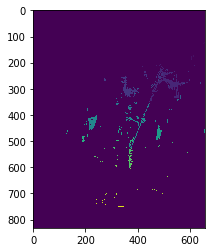

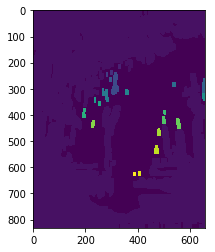

In [34]:
from scipy.ndimage import measurements, morphology
im = array(Image.open('E:\\imageTool\\1.jpg').convert('L'))
im = 1*(im<128)
labels, nbr_objects = measurements.label(im)
print(labels)
imshow(labels)
show()

#二进制开操作
im_open = morphology.binary_opening(im, ones((9,5)), iterations=2)
labels_open , nbr_objects_open = measurements.label(im_open)
imshow(labels_open)
show()

## 以图片形式保存数组

In [ ]:
from scipy.misc import imsave
imsave('E:\\imageTool\test.jpg', im)